# Case 1. Heart Disease Classification

Saana Vallius

3.2S.2018

Helsinki Metropolia University of Applied Sciences

## 1. Objectives

The main objective of the assignment is to build a dense neural network for predicting whether a patient has heart disease. The classification between affected and healthy individuals is based on a collection of data concerning heart disease diagnosis collected in four health institutions: Cleveland Clinic Foundation (cleveland.data), Hungarian Institute of Cardiology, Budapest (hungarian.data), V.A. Medical Center, Long Beach, CA (long-beach-va.data) and University Hospital, Zurich, Switzerland (switzerland.data). The principal inverstigators responsible for collecting the data are listed below:

| Principal investigators     |Institution                                                      |
|:----------------------------|:----------------------------------------------------------------|
| Andras Janosi, M.D.         | Hungarian Institute of Cardiology. Budapest, Hungary            |
| William Steinbrunn, M.D.    | University Hospital. Zurich, Switzerland                        |
| Matthias Pfisterer, M.D     | University Hospital. Basel, Switzerland                         |
| Robert Detrano, M.D., Ph.D. | V.A. Medical Center. Long Beach and Cleveland Clinic Foundation |

Additionally, the goal for this project is to learn how to read and process data in various ways using pandas to enable the use of the data in training the network.

## 2. Required Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import models
from keras import layers

Using TensorFlow backend.


## 3. Data Description and Preprocessing

The heart disease directory contains four databases all of the same type. They have 920 samples in total.
The databases present 76 different numeric attributes but only 14 of them are used:

1. Age (age)
2. Sex (sex)
3. Chest Pain Type (cp)
4. Resting Blood Pressure in mmHg (trestbps) 
5. Serum Cholesterol in mg/dl (chol)      
6. Fasting Blood Sugar > 120mg/dl (fbs)
 - Value 0: (false)
 -  Value 1: (true)
7. Resting Electrocardiographic Results(restecg)
 - Value 0: Normal
 - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05)
8. Maximum Heartrate Achieved (thalach)   
9. Exercise Induced Angina (exang)
 - Value 0: No
 - Value 1: Yes
10. ST Depression Induced by Exercise Relative to Rest (oldpeak)   
11. Slope of The Peak Exercise ST Segment (slope)
 - Value 1: Upsloping
 - Value 2: Flat
 - Value 3: Downsloping
12. Number of Major Vessels (0-3) Coloured by Fluoroscopy (ca)        
13. 3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect (thal)      
14. Diagnosis of Heart Disease (Angiographic Disease Status) (num)
 - Value 0: < 50% Diameter Narrowing
 - Value 1,2,3,4: > 50% Diameter Narrowing (in any major vessel)




There have been several attempts of trying to make predictions based on the data. These trials have utilized various kinds of algorithms and clustering and classification methods and reached accuracies ranging from 74.8% to 78.9%. All these published experiments have used the same 14 attributes as the ones used in this project. The information sheet of the databases states that only one of the databases, Cleveland data, has been used in these machine learning experiments.

The data dates back to year 1988 and the latest updates to the directory are from 1996. The author of the database has posted, along with the database, a warning that the file cleveland.data has been corrupted but the preprocessed processed.cleveland.data would be safe to use. All the other datasets used in this project to get the final results consisted of raw data. 

The labels (num) from 0 to 4 are treated so that the value of 0 means the individual healthy and anything from 1 to 4 that the individual is affected by heart disease. The databases that have been processed by the author all use '?' as a marker for missing values. The unprocessed databases, however, mark those values as the value -9.0.

### 3.1 Reading Data
* Read data both from processed and raw text files
* Combine the data and labels into one set
* Add column names
* Name missing values as NaN


In [2]:
#Define column names
column_names = (['age','sex','cp','trestbps','chol',
                'fbs','restecg','thalach','exang',
                 'oldpeak','slope','ca','thal','num'])

#Read file to pandas data frame, missing symbols marked as '?' are changed to NaN (PROCESSED DATA)
cl_data = pd.read_csv('processed.cleveland.data.txt', names = column_names, na_values='?', dtype='float64')
#hu_data = pd.read_csv('processed.hungarian.data.txt', names = column_names, na_values='?', dtype='float64')
#lb_data = pd.read_csv('processed.va.data.txt', names = column_names, na_values='?', dtype='float64')
#sw_data = pd.read_csv('processed.switzerland.data.txt', names = column_names, na_values='?', dtype='float64')
#all_data = cl_data.append([hu_data, lb_data, sw_data], ignore_index = True)

all_data = cl_data

In [3]:
#Read raw data
temp = ''
lines = []
space = ' '
raw_data = pd.DataFrame()

files = ['long-beach-va.data.txt','hungarian.data.txt', 'switzerland.data.txt']

#Read all raw files line by line
for file in files:
    with open(file) as f:
        for line in f:
            if(line.endswith('\n')):
                temp+=space
            temp+=line.rstrip('\n')
            if (temp.endswith('name')):
                l = []
                for t in temp.split():
                    l.append(t)
                lines.append(l)
                temp = ''
    raw_data = raw_data.append(pd.DataFrame(lines))
    lines = []
    
#Check the shapes of the data frames
print(all_data.shape)
print(raw_data.shape)

(303, 14)
(617, 76)


In [4]:
#Separate the data from the labels (PROCESSED DATA)

cl_labels = cl_data['num']
#hu_labels = hu_data['num']
#lb_labels = lb_data['num']
#sw_labels = sw_data['num']
#all_labels = cl_labels.append([hu_labels, lb_labels, sw_labels], ignore_index = True)
all_labels = cl_labels


#Drop the 'num' column from the data
cl_data.drop('num', inplace=True, axis=1)
#hu_data.drop('num', inplace=True, axis=1)
#lb_data.drop('num', inplace=True, axis=1)
#sw_data.drop('num', inplace=True, axis=1)
#all_data.drop('num', inplace=True, axis=1)

In [5]:
#Save the labels
raw_labels = raw_data[57]

#Select the 13 needed data columns from the data
raw_data = raw_data[[2,3,8,9,11,15,18,31,37,39,40,43,50]]
raw_data.columns = ['age','sex','cp','trestbps','chol',
                    'fbs','restecg','thalach','exang',
                    'oldpeak','slope','ca','thal']

#Verify the shapes
print(raw_data.shape)
print(all_data.shape)
print(raw_labels.shape)
print(all_labels.shape)

(617, 13)
(303, 13)
(617,)
(303,)


In [6]:
#Merge the data frames
all_data = all_data.append(raw_data, ignore_index = True)
all_labels = all_labels.append(raw_labels)

#Change type to float64
all_data = all_data.astype('float64')
all_labels = all_labels.astype('float64')

#Check shapes and types
print(all_data.shape)
print(all_labels.shape)

#Mark -9.0 as NaN
all_data = all_data.replace(-9,np.nan)

(920, 13)
(920,)


### 3.2 Basic Information
* Retrieve and show basic information on the data such as data types, shape, NaN values, and pairwise correlation 

In [7]:
#Check types and shape of data
print('Data types\n----------------------\n', all_data.dtypes)
print('\n\nData shape:', all_data.shape)

#How many NaN values are there per column
print('\n\nNaN values per column\n----------------------\n',np.sum(np.isnan(all_data)))

#Check label values
print('\nMaximum of labels:',np.max(all_labels))

#Basic information
all_data.describe()

Data types
----------------------
 age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object


Data shape: (920, 13)


NaN values per column
----------------------
 age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       308
ca          610
thal        477
dtype: int64

Maximum of labels: 4.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,612.000000,310.000000,443.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.767974,0.703226,5.040632
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.622876,1.046951,1.944518
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,1.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000


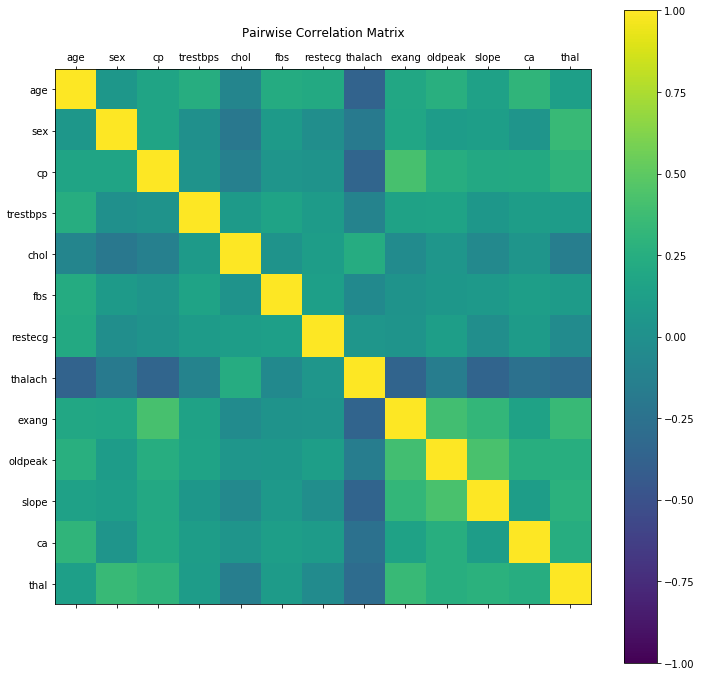

In [8]:
#Calculate pairwise correlation coefficients
correlations = all_data.corr()

#Plot the correlation matrix
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13)
plt.title('Pairwise Correlation Matrix')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(correlations))
ax.set_yticklabels(list(correlations))
plt.show()

The data has the shape of a two-dimensional array (920,13) and all the data values are floating point numbers as assumed (no more corrupted or encoded missing data). There are over a thousand NaN values which will need to be changed to mean values before creating the model. The maximum value of the labels is 4, but the categorization is to be done with only two options, healthy or affected, so the values from 2 to 4 must be changed to 1. The values also need to be scaled as the dataset includes variables with quite different ranges of values (for example 0 to 1 and 126 to 564).

The pairwise correlation matrix shows how the attributes intercorrelate. There is, for example, negative correlation between the maximum heart rate achieved and age as well as exercise induced chest pain.

### 3.3 Preprocessing
* Turn label values of 2 to 4 to 1
* Replace NaN values with mean values
* Scale the data (from 0 to 1)

In [9]:
#Turn label values of 2 to 4 to 1 to produce binary outcome
all_labels = all_labels.replace([2,3,4], 1)

#Replace NaN values with mean values
all_data = all_data.fillna(all_data.mean())

#Scale the data from 0 to 1
scaler = preprocessing.MinMaxScaler()
all_scaled_data = scaler.fit_transform(all_data)

In [10]:
#Verify the results
print('Labels: minimum:', np.min(all_labels),'maximum:', np.max(all_labels))
print('\nScaled Data\n----------------')
print(all_scaled_data)
print('\nminimum:', np.min(all_scaled_data), 
      ' \nmaximum:', np.max(all_scaled_data), 
      ' \nmean:', np.mean(all_scaled_data),
      ' \nstandard deviation:', np.std(all_scaled_data))

Labels: minimum: 0.0 maximum: 1.0

Scaled Data
----------------
[[ 0.71428571  1.          0.         ...,  1.          0.          0.83333333]
 [ 0.79591837  1.          1.         ...,  0.66666667  0.33333333
   0.33333333]
 [ 0.79591837  1.          1.         ...,  0.66666667  0.22222222  1.        ]
 ..., 
 [ 0.57142857  1.          0.66666667 ...,  0.66666667  0.0781362   1.        ]
 [ 0.53061224  1.          1.         ...,  0.66666667  0.0781362   1.        ]
 [ 0.7755102   0.          1.         ...,  0.58932462  0.0781362   1.        ]]

minimum: 0.0  
maximum: 1.0  
mean: 0.476239671236  
standard deviation: 0.347073452951


## 4 Modeling
* Divide the data so that 70% of it is used for training and 30% for validation
* Create the dense model and compile it

In [11]:
#Splitting the data into separate training and validation sets (70% / 30%)
x_train, x_val, y_train, y_val = train_test_split(all_scaled_data, all_labels, test_size=0.30)

#Verify the set shapes
print('Shapes\n------------------',
      '\nx_train:',x_train.shape,
      '\ny_train:',y_train.shape,
      '\nx_test: ', x_val.shape,
      '\ny_test: ', y_val.shape)

Shapes
------------------ 
x_train: (644, 13) 
y_train: (644,) 
x_test:  (276, 13) 
y_test:  (276,)


In [12]:
#Create the model
model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = 13))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

## 5. Training and Testing

In [13]:
#Training the model

#N = number of epochs, B = batch size
N = 30
B = 16

#Train the model
h = model.fit(x_train, y_train, 
                 verbose = 0, 
                 epochs = N, 
                 batch_size = B, 
                 validation_data=(x_val,y_val))

### 5.1 Plotting Results

In [14]:
#Saving required data into variables

epochs = range(1, N + 1)

acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

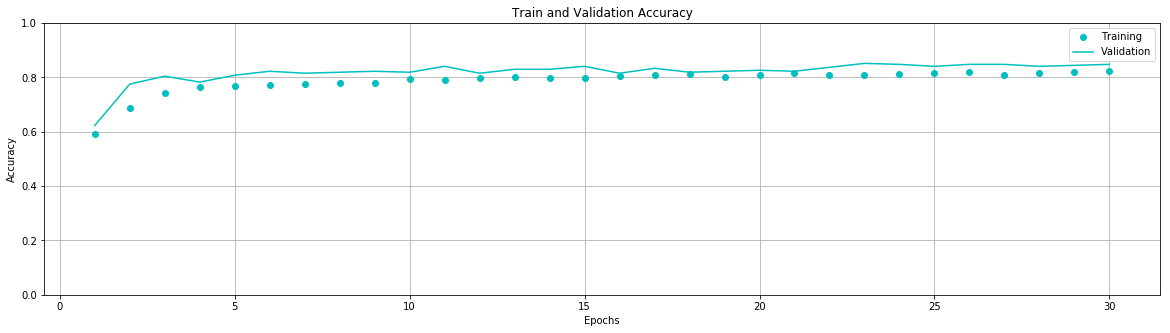

In [15]:
#Plotting Accuracy

plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'co', label='Training')
plt.plot(epochs, val_acc, 'c', label = 'Validation')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

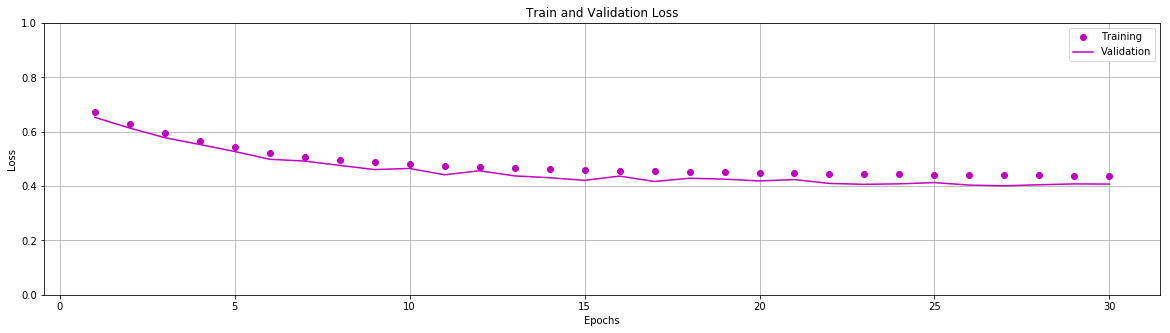

In [16]:
#Plotting Loss

plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'mo', label='Training')
plt.plot(epochs, val_loss, 'm', label = 'Validation')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

In [17]:
#Evaluate the model
evaluated = model.evaluate(x_val, y_val, batch_size = B, verbose=0)
print('Accuracy: ',evaluated[1])
print('Loss:     ',evaluated[0])

Accuracy:  0.847826086957
Loss:      0.407367540442


## 6. Conclusions

The final result of the best neural network setup ranged between 80% and 83%. Compared to prior attempts by researchers (78.9% at highest), the project was very succesful. Processing the raw data proved to be the most time-consuming part. The neural network model was tested with various settings:

* Layers 1,2
* Layer 1 neurons 8,12,16,32,64,512
* Layer 2 neurons 4,8,16
* Epochs 10-100
* Batch Size 16-128

The final model consisted of two hidden layers with 16 and 12 neurons, 30 epochs and a batch size of 16. On some rounds of testing, the network seemed to bite better on the validation data than the training set. This is probably caused by the fact that the dataset of less than a 1000 samples is quite small. On such a small set, model underfitting might cause the validation set to fit better only because of pure chance. This might lead to seemingly good results in accuracy and loss, but taking a look at the differences of the training and validation set plots over the values unveils the truth.

All in all, the problem was challenging, bewildering at times, yet a great brain-teaser and the project could not have succeeded better.